In [16]:
#Cumhuriye Tulug Kucukogut
#S025791
import numpy as np
import matplotlib.pyplot as plt
#import mnist_reader
#X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
#X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [20]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte'
                               % kind)

    with open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [21]:
#to upload data
X_train, y_train = load_mnist('/home/tulug/Downloads/archive', kind='train')
X_test, y_test = load_mnist('/home/tulug/Downloads/archive', kind='t10k')

In [22]:
#showing which images are 5 and how many of them
x_train_zeros = X_train[y_train == 5]
print(len(x_train_zeros))

6000


In [23]:
X_train.shape #60000 count of pics 784 is 28x28 height and width

(60000, 784)

In [24]:
#reshaping data for  showing clothes
X_train_img = np.reshape(X_train, (-1, 28, 28))
X_train_img.shape

(60000, 28, 28)

In [25]:
y_train.shape

(60000,)

In [26]:
X_test.shape

(10000, 784)

In [55]:
X_test_img = np.reshape(X_test, (-1, 28, 28))
X_test_img.shape

(10000, 28, 28)

In [56]:
y_test.shape

(10000,)

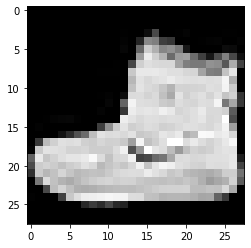

labels
9


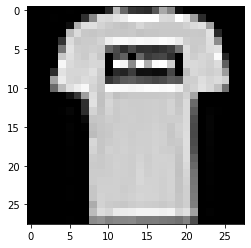

labels
0


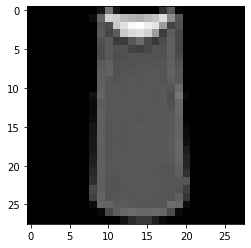

labels
0


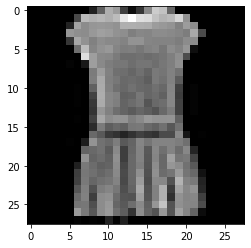

labels
3


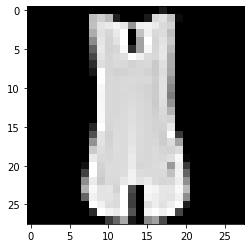

labels
0


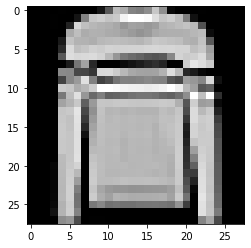

labels
2


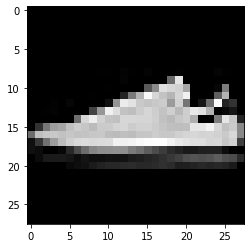

labels
7


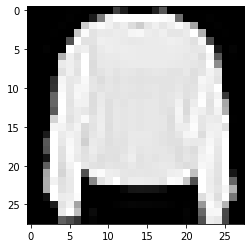

labels
2


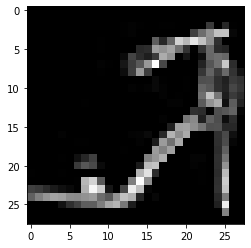

labels
5


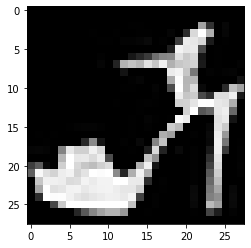

labels
5


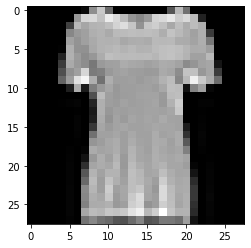

labels
0


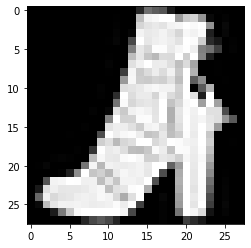

labels
9


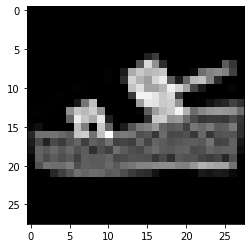

labels
5


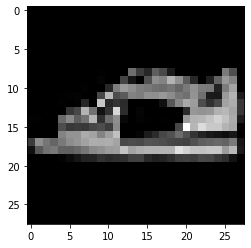

labels
5


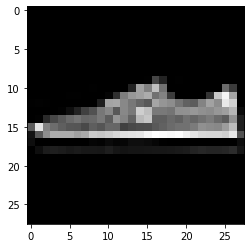

labels
7


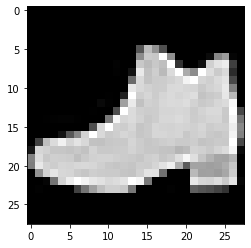

labels
9


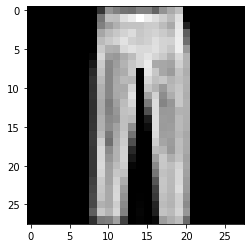

labels
1


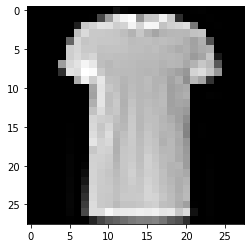

labels
0


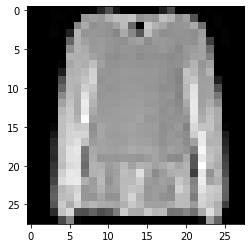

labels
6


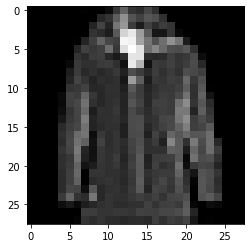

labels
4


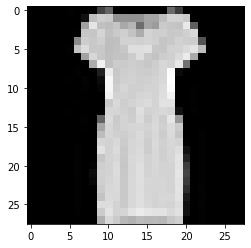

labels
3


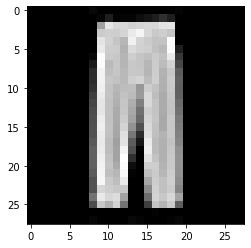

labels
1


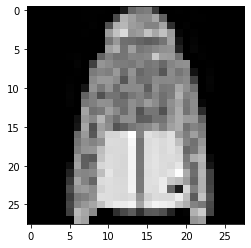

labels
4


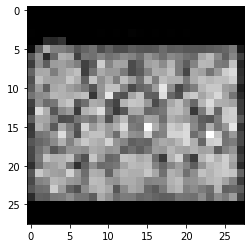

labels
8


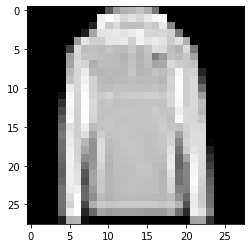

labels
4


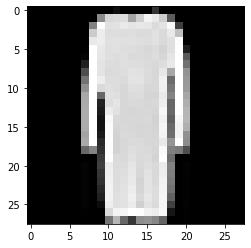

labels
3


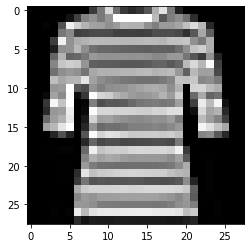

labels
0


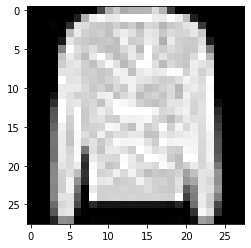

labels
2


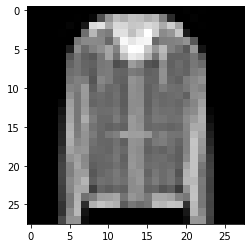

labels
4


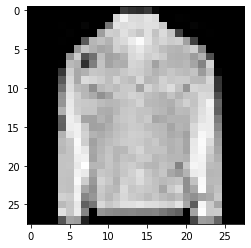

labels
4


In [27]:
#showing first 30 clothes
for i in range(0,30):
    pixels = np.array(X_train_img[i], dtype='float')
    plt.imshow(pixels, cmap='gray')
    plt.show()
    print("labels")
    print(y_train[i])

In [37]:
type(y_train)

numpy.ndarray

In [205]:
#finding clothes which label is coat
b = np.where(y_train==4)
print(b)

(array([   19,    22,    24, ..., 59984, 59986, 59990]),)


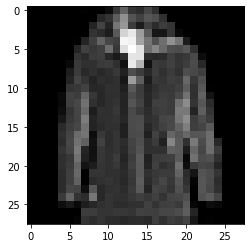

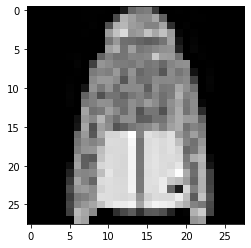

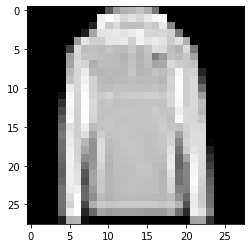

In [28]:
#and showing them
for i in [19,22,24]:    
    pixels = np.array(X_train_img[i], dtype='float')
    plt.imshow(pixels, cmap='gray')
# show the figure
    plt.show()

In [29]:
b = np.where(y_train==9)
print(b)

(array([    0,    11,    15, ..., 59932, 59970, 59978]),)


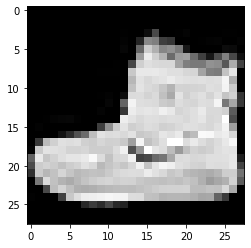

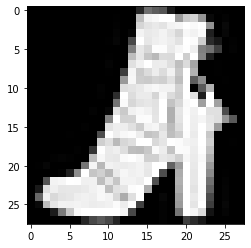

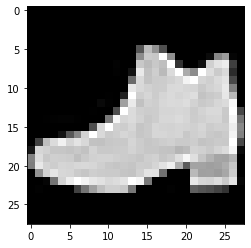

In [30]:
#finding clothes which label is ankle boat
for i in [0,11,15]:    
    pixels = np.array(X_train_img[i], dtype='float')
    plt.imshow(pixels, cmap='gray')
# show the figure
    plt.show()


In [31]:
X_train[0].shape

(784,)

In [45]:
#creating label dictionary
labelDict = {0:"tshirt",
             1 : "pants",
             2: "sweater",
             3: "dress",
             4: "coat",
             5 : "sandals",
             6: "shirt",
             7:"sneaker",
             8: "bag",
             9 : "ankle boat"
             
    
}

In [32]:
X_train[1].shape

(784,)

In [33]:
X_train.shape

(60000, 784)

In [34]:
X_test.shape

(10000, 784)

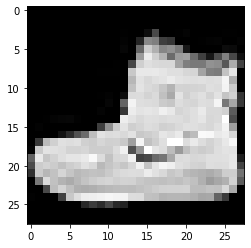

In [35]:
first_image = X_train[0]
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [36]:
#scaling of data
from sklearn.preprocessing import StandardScaler
myscaler=StandardScaler()
x_train_std=myscaler.fit_transform(X_train)

In [37]:
x_test_std=myscaler.fit_transform(X_test)

In [38]:
#implementation of knn
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn=KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)

In [40]:
knn.fit(x_train_std,y_train)

KNeighborsClassifier()

In [41]:
knn.predict(x_test_std)

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [42]:
knn.score(x_test_std,y_test)

0.8536

In [43]:
#for comparing algorithm results according to neighbour count
knn=KNeighborsClassifier(n_neighbors=7, metric="minkowski", p=2)
knn.fit(x_train_std,y_train)
knn.predict(x_test_std)
knn.score(x_test_std,y_test)

0.8525

In [44]:
knn=KNeighborsClassifier(n_neighbors=3, metric="minkowski", p=2)
knn.fit(x_train_std,y_train)
knn.predict(x_test_std)
knn.score(x_test_std,y_test)

0.8499

In [193]:
knn=KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn.fit(x_train_std,y_train)
knn.predict(x_test_std)
knn.score(x_test_std,y_test)

0.8536

In [87]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [194]:
#showing the results of accuracy,recall,precision and F1
print("Accuracy", accuracy_score(y_test, knn.predict(x_test_std)))
print("Recall", recall_score(y_test, knn.predict(x_test_std),average="micro"))
print("Precision", precision_score(y_test, knn.predict(x_test_std), average="micro"))
print("F1", f1_score(y_test, knn.predict(x_test_std),average="micro"))

Accuracy 0.8536
Recall 0.8536
Precision 0.8536
F1 0.8536


In [94]:
#missclassified result
print("Misclassification", (y_test!=knn.predict(x_test_std)).sum())

Misclassification 1464


In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [96]:
#creating confusion matrix
cm=confusion_matrix(y_test, knn.predict(x_test_std))

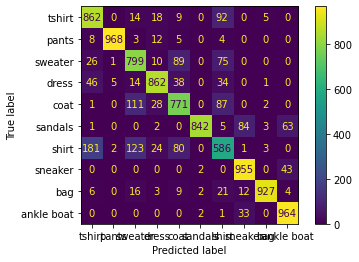

In [97]:
#showing them
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelDict.values())
disp.plot()

In [98]:
predicted = knn.predict(x_test_std)

In [99]:
predicted

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [100]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [102]:
print("Misclassification", (y_test!=knn.predict(x_test_std)))

Misclassification [False False False ... False False False]


In [109]:
#finding missclassified items
misclassification = (y_test!=knn.predict(x_test_std))

In [209]:
#finding missclassified items locations
misLocation = np.where(misclassification==True)
print(misLocation)

(array([   7,   10,   17, ..., 9989, 9991, 9999]),)


In [116]:
y_test[17]


4

In [118]:
predicted[17]

6

In [119]:
y_test[0]

9

In [120]:
predicted[0]

9

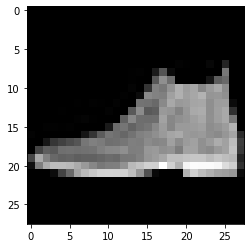

ankle boat


In [124]:
#and showing them
first_image = X_test[0]
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

print(labelDict[predicted[0]])

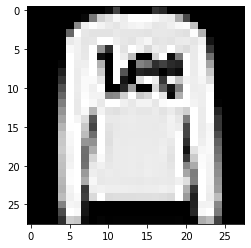

sweater


In [125]:
first_image = X_test[1]
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

print(labelDict[predicted[1]])

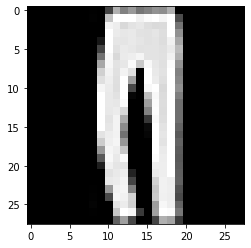

pants


In [126]:
first_image = X_test[2]
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

print(labelDict[predicted[2]])

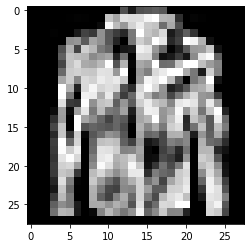

shirt


In [127]:
first_image = X_test[17]
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

print(labelDict[predicted[17]])

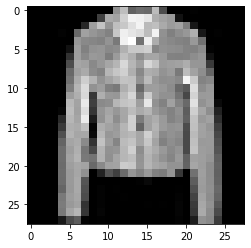

coat


In [203]:
first_image = X_test[10]
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

print(labelDict[predicted[10]])

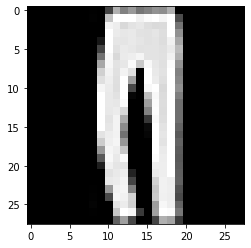

pants


In [201]:
first_image = X_test[2]
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

print(labelDict[predicted[2]])

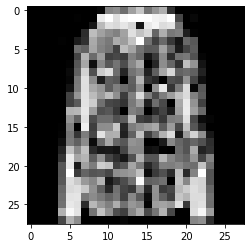

sweater


In [204]:
first_image = X_test[9989]
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

print(labelDict[predicted[9989]])

In [ ]:
first_image = X_test[25]
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

print(labelDict[predicted[25]])

In [130]:
#reporting results
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.74      0.80      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.77      0.77      0.77      1000
           5       0.99      0.84      0.91      1000
           6       0.65      0.59      0.62      1000
           7       0.88      0.95      0.92      1000
           8       0.99      0.93      0.96      1000
           9       0.90      0.96      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [210]:
X_train, y_train = load_mnist('/home/tulug/fashion-mnist/data/fashion', kind='train')
X_test, y_test = load_mnist('/home/tulug/fashion-mnist/data/fashion', kind='t10k')

In [211]:
#implementation of random forest classifier
from sklearn.ensemble import RandomForestClassifier
myforest = RandomForestClassifier(criterion='entropy', max_depth=5, random_state=0)
myforest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=0)

In [212]:
myforest.score(X_test,y_test)

0.759

In [213]:
predicted = myforest.predict(X_test)
predicted
print("Misclassification", (y_test!= predicted).sum())

Misclassification 2410


In [137]:
#finding misclassified
misclassification = (y_test!=predicted)
misLocation = np.where(misclassification==True)
print(misLocation)

(array([   7,   10,   17, ..., 9989, 9991, 9999]),)


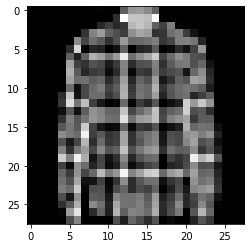

coat


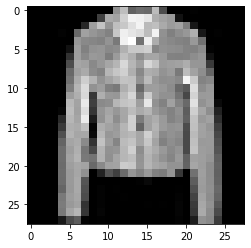

sweater


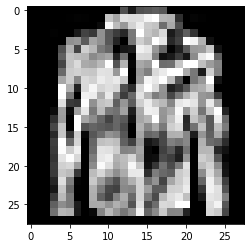

sweater


In [219]:
for i in [7,10,17]:    
    pixels = X_test[i].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    print(labelDict[predicted[i]])
# show the figure
    

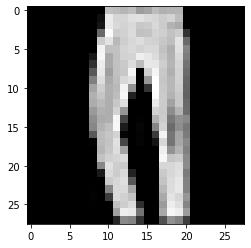

pants


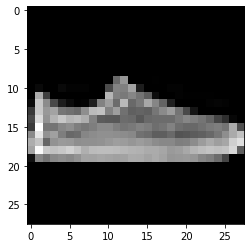

sneaker


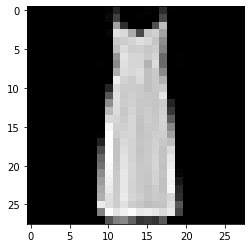

dress


In [220]:
#and showing them
for i in [5,12,13]:    
    pixels = X_test[i].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    print(labelDict[predicted[i]])

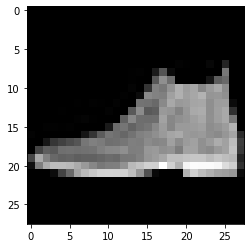

ankle boat


In [139]:
#showing them
first_image = X_test[0]
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

print(labelDict[predicted[0]])

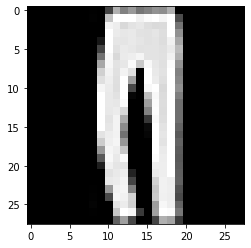

pants


In [140]:
first_image = X_test[2]
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

print(labelDict[predicted[2]])

In [141]:
myforest.predict_proba(X_test)

array([[9.36360000e-04, 4.29788538e-04, 4.79430949e-04, ...,
        2.91408416e-01, 1.86935989e-02, 4.90960855e-01],
       [2.40120008e-02, 1.30735454e-02, 5.00355002e-01, ...,
        9.17538623e-03, 3.38859651e-02, 3.87234104e-02],
       [7.39919895e-03, 9.33983530e-01, 7.41416781e-04, ...,
        4.54516086e-05, 1.96564551e-03, 2.54698643e-04],
       ...,
       [7.77293023e-02, 6.70039833e-02, 1.21398644e-02, ...,
        1.32322282e-02, 3.78232069e-01, 3.62847893e-02],
       [1.14772230e-02, 8.08853373e-01, 1.09332267e-03, ...,
        4.18245624e-04, 3.87033624e-03, 1.57644358e-03],
       [4.94726172e-03, 3.97233350e-04, 2.89455401e-03, ...,
        4.64058740e-01, 2.21331074e-01, 6.71101813e-02]])

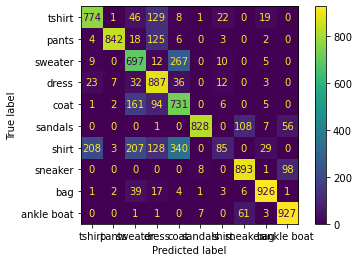

In [142]:
#showing confussion matrix
cm=confusion_matrix(y_test, predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelDict.values())
disp.plot()

In [129]:
#showing classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.74      0.80      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.77      0.77      0.77      1000
           5       0.99      0.84      0.91      1000
           6       0.65      0.59      0.62      1000
           7       0.88      0.95      0.92      1000
           8       0.99      0.93      0.96      1000
           9       0.90      0.96      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [146]:
#printing results of accuracy, recall,precision and F1
print("Accuracy", accuracy_score(y_test, predicted))
print("Recall", recall_score(y_test, predicted,average="micro"))
print("Precision", precision_score(y_test, predicted, average="micro"))
print("F1", f1_score(y_test, predicted,average="micro"))

Accuracy 0.759
Recall 0.759
Precision 0.759
F1 0.7590000000000001


In [221]:
#implementing of svm
from sklearn.svm import SVC
mysvc=SVC(kernel="linear", C=0.1, random_state=0)


In [222]:
mysvc.fit(x_train_std, y_train)

SVC(C=0.1, kernel='linear', random_state=0)

In [149]:
mysvc.predict(x_test_std)


array([9, 2, 1, ..., 6, 1, 5], dtype=uint8)

In [223]:
predicted = mysvc.predict(x_test_std)


In [226]:
mysvc.score(x_test_std,y_test)

0.8454

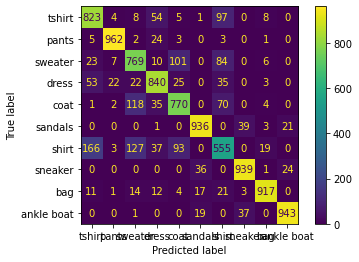

In [227]:
#showing confussion matrix
cm=confusion_matrix(y_test, predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelDict.values())
disp.plot()

In [228]:
#printing results of accuracy, recall,precision and F1
print("Accuracy", accuracy_score(y_test, predicted))
print("Recall", recall_score(y_test,predicted,average="micro"))
print("Precision", precision_score(y_test, predicted, average="micro"))
print("F1", f1_score(y_test,predicted,average="micro"))

Accuracy 0.8454
Recall 0.8454
Precision 0.8454
F1 0.8454


In [229]:
#showing misclassified
print("Misclassification", (y_test!= predicted).sum())
misclassification = (y_test!=predicted)
misLocation = np.where(misclassification==True)
print(misLocation)

Misclassification 1546
(array([  12,   17,   23, ..., 9989, 9991, 9997]),)


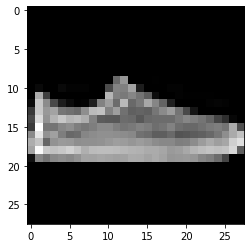

sandals


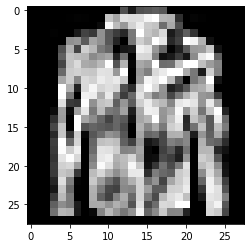

sweater


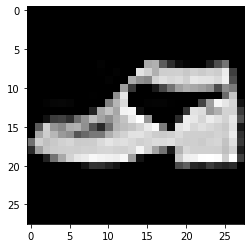

sandals


In [230]:
#showing misclassified
for i in [12,17,23]:    
    pixels = X_test[i].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    print(labelDict[predicted[i]])

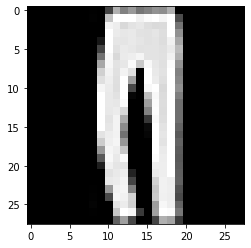

pants


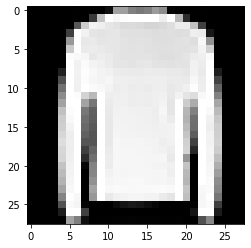

sweater


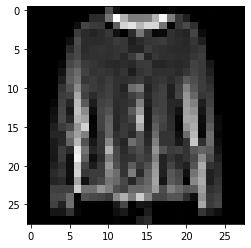

sweater


In [231]:
#showing classified
for i in [2,77,25]:    
    pixels = X_test[i].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    print(labelDict[predicted[i]])